In [69]:
import tensorflow as tf
import pandas as pd
import numpy as np
import string
import re
import itertools
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [70]:
df_german = pd.read_csv('C:/Users/joshu/Documents/UNCC_Material/Spring_2021/Applied_Machine_Learning/Group_Project/German/news-commentary-v15.de-en.tsv', sep='\t', error_bad_lines=False, header=None, warn_bad_lines=False)
df_chinese = pd.read_csv('C:/Users/joshu/Documents/UNCC_Material/Spring_2021/Applied_Machine_Learning/Group_Project/Chinese/news-commentary-v15.en-zh.tsv', sep='\t', error_bad_lines=False, header=None, warn_bad_lines=False)

In [71]:
pd.set_option('display.max_colwidth', None)

In [107]:
df_german = df_german.rename(columns={0:'German', 1:'English'})
df_german.head()

,German,English
0,Steigt Gold auf 10.000 Dollar?,"$10,000 Gold?"
1,"SAN FRANCISCO – Es war noch nie leicht, ein rationales Gespräch über den Wert von Gold zu führen.",SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold.
2,"In letzter Zeit allerdings ist dies schwieriger denn je, ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen.","Lately, with gold prices up more than 300% over the last decade, it is harder than ever."
3,"Erst letzten Dezember verfassten meine Kollegen Martin Feldstein und Nouriel Roubini Kommentare, in denen sie mutig die vorherrschende optimistische Marktstimmung hinterfragten und sehr überlegt auf die Risiken des Goldes hinwiesen.","Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks."
4,"Und es kam, wie es kommen musste.",Wouldn’t you know it?


In [73]:
df_chinese = df_chinese.rename(columns={0:'English', 1:'Chinese'})
df_chinese.head()

,English,Chinese
0,1929 or 1989?,1929年还是1989年?
1,"PARIS – As the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening.",巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。
2,"At the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates refer to classical cyclical downturns.",一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为这两段时期意味着典型的周期性衰退。
3,"Today, the mood is much grimmer, with references to 1929 and 1931 beginning to abound, even if some governments continue to behave as if the crisis was more classical than exceptional.",如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政府的表现仍然似乎把视目前的情况为是典型的而看见的衰退。
4,The tendency is either excessive restraint (Europe) or a diffusion of the effort (the United States).,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。


In [108]:
df_german.isnull().sum()

German     9453
English    9400
dtype: int64

In [75]:
df_chinese.isnull().sum()

English    8224
Chinese    8168
dtype: int64

In [76]:
df_german[df_german.isnull().any(axis=1)]

,German,English
46,NaN,NaN
77,NaN,NaN
117,Der Neoliberalismus füllte dieses Vakuum.,NaN
127,NaN,NaN
167,NaN,NaN
...,...,...
369595,NaN,NaN
369627,NaN,NaN
369658,NaN,NaN
369696,NaN,NaN


In [77]:
df_chinese[df_chinese.isnull().any(axis=1)]

,English,Chinese
30,NaN,NaN
65,NaN,NaN
97,NaN,NaN
136,NaN,NaN
172,NaN,NaN
...,...,...
320604,NaN,NaN
320637,NaN,NaN
320676,NaN,NaN
320682,Zuma is legendary for his ability to connect with ordinary people.,NaN


In [109]:
df_german = df_german.dropna()
df_german.isnull().sum()

German     0
English    0
dtype: int64

In [79]:
df_chinese = df_chinese.dropna()
df_chinese.isnull().sum()

English    0
Chinese    0
dtype: int64

In [110]:
#convert everything to lower case
df_german['German'] = df_german['German'].apply(lambda x:x.lower())
df_german['English'] = df_german['English'].apply(lambda x:x.lower())

df_chinese['Chinese'] = df_chinese['Chinese'].apply(lambda x:x.lower())
df_chinese['English'] = df_chinese['English'].apply(lambda x:x.lower())

In [81]:
df_chinese.head()

,English,Chinese
0,1929 or 1989?,1929年还是1989年?
1,"paris – as the economic crisis deepens and widens, the world has been searching for historical analogies to help us understand what has been happening.",巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。
2,"at the start of the crisis, many people likened it to 1982 or 1973, which was reassuring, because both dates refer to classical cyclical downturns.",一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为这两段时期意味着典型的周期性衰退。
3,"today, the mood is much grimmer, with references to 1929 and 1931 beginning to abound, even if some governments continue to behave as if the crisis was more classical than exceptional.",如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政府的表现仍然似乎把视目前的情况为是典型的而看见的衰退。
4,the tendency is either excessive restraint (europe) or a diffusion of the effort (the united states).,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。


In [111]:
#remove special characters
df_german['German'] = df_german['German'].map(lambda x: re.sub(r"[$%-()\"#/@;:<>{}`+=~|.!?,]", "", x))
df_german['English'] = df_german['English'].map(lambda x: re.sub(r"[$%-()\"#/@;:<>{}`+=~|.!?,]", "", x))

df_german.head()

,German,English
0,steigt gold auf 10000 dollar,10000 gold
1,san francisco – es war noch nie leicht ein rationales gespräch über den wert von gold zu führen,san francisco – it has never been easy to have a rational conversation about the value of gold
2,in letzter zeit allerdings ist dies schwieriger denn je ist doch der goldpreis im letzten jahrzehnt um über 300 prozent angestiegen,lately with gold prices up more than 300 over the last decade it is harder than ever
3,erst letzten dezember verfassten meine kollegen martin feldstein und nouriel roubini kommentare in denen sie mutig die vorherrschende optimistische marktstimmung hinterfragten und sehr überlegt auf die risiken des goldes hinwiesen,just last december fellow economists martin feldstein and nouriel roubini each penned op-eds bravely questioning bullish market sentiment sensibly pointing out gold’s risks
4,und es kam wie es kommen musste,wouldn’t you know it


In [83]:
df_chinese['Chinese'] = df_chinese['Chinese'].map(lambda x: re.sub(r"[$%-()\"#/@;:<>{}`+=~|.!?,]", "", x))
df_chinese['English'] = df_chinese['English'].map(lambda x: re.sub(r"[$%-()\"#/@;:<>{}`+=~|.!?,]", "", x))

df_chinese.head()

,English,Chinese
0,1929 or 1989,1929年还是1989年
1,paris – as the economic crisis deepens and widens the world has been searching for historical analogies to help us understand what has been happening,巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。
2,at the start of the crisis many people likened it to 1982 or 1973 which was reassuring because both dates refer to classical cyclical downturns,一开始，很多人把这次危机比作1982年或1973年所发生的情况，这样得类比是令人宽心的，因为这两段时期意味着典型的周期性衰退。
3,today the mood is much grimmer with references to 1929 and 1931 beginning to abound even if some governments continue to behave as if the crisis was more classical than exceptional,如今人们的心情却是沉重多了，许多人开始把这次危机与1929年和1931年相比，即使一些国家政府的表现仍然似乎把视目前的情况为是典型的而看见的衰退。
4,the tendency is either excessive restraint europe or a diffusion of the effort the united states,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。


In [112]:
# remove rows that contain numbers
df_german = df_german[~df_german.German.str.contains(r'[0-9]')]
df_german.head()

,German,English
1,san francisco – es war noch nie leicht ein rationales gespräch über den wert von gold zu führen,san francisco – it has never been easy to have a rational conversation about the value of gold
3,erst letzten dezember verfassten meine kollegen martin feldstein und nouriel roubini kommentare in denen sie mutig die vorherrschende optimistische marktstimmung hinterfragten und sehr überlegt auf die risiken des goldes hinwiesen,just last december fellow economists martin feldstein and nouriel roubini each penned op-eds bravely questioning bullish market sentiment sensibly pointing out gold’s risks
4,und es kam wie es kommen musste,wouldn’t you know it
5,seit der veröffentlichung ihrer artikel ist der goldpreis noch weiter gestiegen,since their articles appeared the price of gold has moved up still further
8,beflügelt aufgrund des anhaltenden aufwärtstrends meint man nun mancherorts dass gold sogar noch höher steigen könnte,now emboldened by continuing appreciation some are suggesting that gold could be headed even higher than that


In [85]:
# remove rows that contain numbers
df_chinese = df_chinese[~df_chinese.Chinese.str.contains(r'[0-9]')]
df_chinese.head()

,English,Chinese
1,paris – as the economic crisis deepens and widens the world has been searching for historical analogies to help us understand what has been happening,巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。
4,the tendency is either excessive restraint europe or a diffusion of the effort the united states,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。
5,europe is being cautious in the name of avoiding debt and defending the euro whereas the us has moved on many fronts in order not to waste an ideal opportunity to implement badly needed structural reforms,欧洲在避免债务和捍卫欧元的名义下正变得谨慎，而美国已经在许多方面行动起来，以利用这一理想的时机来实行急需的结构性改革。
7,of course the fall of the house of lehman brothers has nothing to do with the fall of the berlin wall,当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。
8,indeed on the surface it seems to be its perfect antithesis the collapse of a wall symbolizing oppression and artificial divisions versus the collapse of a seemingly indestructible and reassuring institution of financial capitalism,事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一个是看似坚不可摧的并令人安心的金融资本主义机构的倒塌。


In [113]:
german_tokenizer = RegexpTokenizer(r'\w+')
df_german['tokenized_german'] = df_german['German'].apply(nltk_tokenizer.tokenize)
df_german['tokenized_english'] = df_german['English'].apply(nltk_tokenizer.tokenize)

In [114]:
df_german.head()

,German,English,tokenized_german,tokenized_english
1,san francisco – es war noch nie leicht ein rationales gespräch über den wert von gold zu führen,san francisco – it has never been easy to have a rational conversation about the value of gold,"[san, francisco, es, war, noch, nie, leicht, ein, rationales, gespräch, über, den, wert, von, gold, zu, führen]","[san, francisco, it, has, never, been, easy, to, have, a, rational, conversation, about, the, value, of, gold]"
3,erst letzten dezember verfassten meine kollegen martin feldstein und nouriel roubini kommentare in denen sie mutig die vorherrschende optimistische marktstimmung hinterfragten und sehr überlegt auf die risiken des goldes hinwiesen,just last december fellow economists martin feldstein and nouriel roubini each penned op-eds bravely questioning bullish market sentiment sensibly pointing out gold’s risks,"[erst, letzten, dezember, verfassten, meine, kollegen, martin, feldstein, und, nouriel, roubini, kommentare, in, denen, sie, mutig, die, vorherrschende, optimistische, marktstimmung, hinterfragten, und, sehr, überlegt, auf, die, risiken, des, goldes, hinwiesen]","[just, last, december, fellow, economists, martin, feldstein, and, nouriel, roubini, each, penned, op, eds, bravely, questioning, bullish, market, sentiment, sensibly, pointing, out, gold, s, risks]"
4,und es kam wie es kommen musste,wouldn’t you know it,"[und, es, kam, wie, es, kommen, musste]","[wouldn, t, you, know, it]"
5,seit der veröffentlichung ihrer artikel ist der goldpreis noch weiter gestiegen,since their articles appeared the price of gold has moved up still further,"[seit, der, veröffentlichung, ihrer, artikel, ist, der, goldpreis, noch, weiter, gestiegen]","[since, their, articles, appeared, the, price, of, gold, has, moved, up, still, further]"
8,beflügelt aufgrund des anhaltenden aufwärtstrends meint man nun mancherorts dass gold sogar noch höher steigen könnte,now emboldened by continuing appreciation some are suggesting that gold could be headed even higher than that,"[beflügelt, aufgrund, des, anhaltenden, aufwärtstrends, meint, man, nun, mancherorts, dass, gold, sogar, noch, höher, steigen, könnte]","[now, emboldened, by, continuing, appreciation, some, are, suggesting, that, gold, could, be, headed, even, higher, than, that]"


In [88]:
#chinese characters aren't separated by spaces so need to do additional regexp
chinese_tokenizer = RegexpTokenizer(u'[\u2E00-\u9fff]|[0-9]+|[a-zA-Z]+|[%s]'% re.escape(string.punctuation))

df_chinese['tokenized_english'] = df_chinese['English'].apply(chinese_tokenizer.tokenize)
df_chinese['tokenized_chinese'] = df_chinese['Chinese'].apply(chinese_tokenizer.tokenize)

In [89]:
df_chinese.head()

,English,Chinese,tokenized_english,tokenized_chinese
1,paris – as the economic crisis deepens and widens the world has been searching for historical analogies to help us understand what has been happening,巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。,"[paris, as, the, economic, crisis, deepens, and, widens, the, world, has, been, searching, for, historical, analogies, to, help, us, understand, what, has, been, happening]","[巴, 黎, -, 随, 着, 经, 济, 危, 机, 不, 断, 加, 深, 和, 蔓, 延, 整, 个, 世, 界, 一, 直, 在, 寻, 找, 历, 史, 上, 的, 类, 似, 事, 件, 希, 望, 有, 助, 于, 我, 们, 了, 解, 目, 前, 正, 在, 发, 生, 的, 情, 况, 。]"
4,the tendency is either excessive restraint europe or a diffusion of the effort the united states,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。,"[the, tendency, is, either, excessive, restraint, europe, or, a, diffusion, of, the, effort, the, united, states]","[目, 前, 的, 趋, 势, 是, 要, 么, 是, 过, 度, 的, 克, 制, 欧, 洲, 要, 么, 是, 努, 力, 的, 扩, 展, 美, 国, 。]"
5,europe is being cautious in the name of avoiding debt and defending the euro whereas the us has moved on many fronts in order not to waste an ideal opportunity to implement badly needed structural reforms,欧洲在避免债务和捍卫欧元的名义下正变得谨慎，而美国已经在许多方面行动起来，以利用这一理想的时机来实行急需的结构性改革。,"[europe, is, being, cautious, in, the, name, of, avoiding, debt, and, defending, the, euro, whereas, the, us, has, moved, on, many, fronts, in, order, not, to, waste, an, ideal, opportunity, to, implement, badly, needed, structural, reforms]","[欧, 洲, 在, 避, 免, 债, 务, 和, 捍, 卫, 欧, 元, 的, 名, 义, 下, 正, 变, 得, 谨, 慎, 而, 美, 国, 已, 经, 在, 许, 多, 方, 面, 行, 动, 起, 来, 以, 利, 用, 这, 一, 理, 想, 的, 时, 机, 来, 实, 行, 急, 需, 的, 结, 构, 性, 改, 革, 。]"
7,of course the fall of the house of lehman brothers has nothing to do with the fall of the berlin wall,当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。,"[of, course, the, fall, of, the, house, of, lehman, brothers, has, nothing, to, do, with, the, fall, of, the, berlin, wall]","[当, 然, 雷, 曼, 兄, 弟, 公, 司, 的, 倒, 闭, 和, 柏, 林, 墙, 的, 倒, 塌, 没, 有, 任, 何, 关, 系, 。]"
8,indeed on the surface it seems to be its perfect antithesis the collapse of a wall symbolizing oppression and artificial divisions versus the collapse of a seemingly indestructible and reassuring institution of financial capitalism,事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一个是看似坚不可摧的并令人安心的金融资本主义机构的倒塌。,"[indeed, on, the, surface, it, seems, to, be, its, perfect, antithesis, the, collapse, of, a, wall, symbolizing, oppression, and, artificial, divisions, versus, the, collapse, of, a, seemingly, indestructible, and, reassuring, institution, of, financial, capitalism]","[事, 实, 上, 从, 表, 面, 上, 看, 两, 者, 似, 乎, 是, 完, 全, 是, 相, 反, 的, 一, 个, 是, 象, 征, 着, 压, 抑, 和, 人, 为, 分, 裂, 的, 柏, 林, 墙, 的, 倒, 塌, 而, 另, 一, 个, 是, 看, 似, 坚, 不, 可, 摧, 的, 并, 令, 人, 安, 心, 的, 金, 融, 资, 本, 主, 义, 机, 构, 的, 倒, 塌, 。]"


In [90]:
df_chinese.iloc[4]

English                                                 indeed on the surface it seems to be its perfect antithesis the collapse of a wall symbolizing oppression and artificial divisions versus the collapse of a seemingly indestructible and reassuring institution of financial capitalism
Chinese                                                                                                                                                                                                               事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一个是看似坚不可摧的并令人安心的金融资本主义机构的倒塌。
tokenized_english    [indeed, on, the, surface, it, seems, to, be, its, perfect, antithesis, the, collapse, of, a, wall, symbolizing, oppression, and, artificial, divisions, versus, the, collapse, of, a, seemingly, indestructible, and, reassuring, institution, of, financial, capitalism]
tokenized_chinese                                                               [事, 实, 上, 从, 表, 面, 上, 看, 两, 者, 似, 乎, 是, 完, 全, 是, 相, 反, 的

In [115]:
df_german['num_german_tokens'] = df_german['tokenized_german'].apply(len)
df_german['num_english_tokens'] = df_german['tokenized_english'].apply(len)

df_chinese['num_english_tokens'] = df_chinese['tokenized_english'].apply(len)
df_chinese['num_chinese_tokens'] = df_chinese['tokenized_chinese'].apply(len)

In [116]:
df_german.head()

,German,English,tokenized_german,tokenized_english,num_german_tokens,num_english_tokens
1,san francisco – es war noch nie leicht ein rationales gespräch über den wert von gold zu führen,san francisco – it has never been easy to have a rational conversation about the value of gold,"[san, francisco, es, war, noch, nie, leicht, ein, rationales, gespräch, über, den, wert, von, gold, zu, führen]","[san, francisco, it, has, never, been, easy, to, have, a, rational, conversation, about, the, value, of, gold]",17,17
3,erst letzten dezember verfassten meine kollegen martin feldstein und nouriel roubini kommentare in denen sie mutig die vorherrschende optimistische marktstimmung hinterfragten und sehr überlegt auf die risiken des goldes hinwiesen,just last december fellow economists martin feldstein and nouriel roubini each penned op-eds bravely questioning bullish market sentiment sensibly pointing out gold’s risks,"[erst, letzten, dezember, verfassten, meine, kollegen, martin, feldstein, und, nouriel, roubini, kommentare, in, denen, sie, mutig, die, vorherrschende, optimistische, marktstimmung, hinterfragten, und, sehr, überlegt, auf, die, risiken, des, goldes, hinwiesen]","[just, last, december, fellow, economists, martin, feldstein, and, nouriel, roubini, each, penned, op, eds, bravely, questioning, bullish, market, sentiment, sensibly, pointing, out, gold, s, risks]",30,25
4,und es kam wie es kommen musste,wouldn’t you know it,"[und, es, kam, wie, es, kommen, musste]","[wouldn, t, you, know, it]",7,5
5,seit der veröffentlichung ihrer artikel ist der goldpreis noch weiter gestiegen,since their articles appeared the price of gold has moved up still further,"[seit, der, veröffentlichung, ihrer, artikel, ist, der, goldpreis, noch, weiter, gestiegen]","[since, their, articles, appeared, the, price, of, gold, has, moved, up, still, further]",11,13
8,beflügelt aufgrund des anhaltenden aufwärtstrends meint man nun mancherorts dass gold sogar noch höher steigen könnte,now emboldened by continuing appreciation some are suggesting that gold could be headed even higher than that,"[beflügelt, aufgrund, des, anhaltenden, aufwärtstrends, meint, man, nun, mancherorts, dass, gold, sogar, noch, höher, steigen, könnte]","[now, emboldened, by, continuing, appreciation, some, are, suggesting, that, gold, could, be, headed, even, higher, than, that]",16,17


In [93]:
df_chinese.head()

,English,Chinese,tokenized_english,tokenized_chinese,num_english_tokens,num_chinese_tokens
1,paris – as the economic crisis deepens and widens the world has been searching for historical analogies to help us understand what has been happening,巴黎-随着经济危机不断加深和蔓延，整个世界一直在寻找历史上的类似事件希望有助于我们了解目前正在发生的情况。,"[paris, as, the, economic, crisis, deepens, and, widens, the, world, has, been, searching, for, historical, analogies, to, help, us, understand, what, has, been, happening]","[巴, 黎, -, 随, 着, 经, 济, 危, 机, 不, 断, 加, 深, 和, 蔓, 延, 整, 个, 世, 界, 一, 直, 在, 寻, 找, 历, 史, 上, 的, 类, 似, 事, 件, 希, 望, 有, 助, 于, 我, 们, 了, 解, 目, 前, 正, 在, 发, 生, 的, 情, 况, 。]",24,52
4,the tendency is either excessive restraint europe or a diffusion of the effort the united states,目前的趋势是，要么是过度的克制（欧洲 ） ， 要么是努力的扩展（美国 ） 。,"[the, tendency, is, either, excessive, restraint, europe, or, a, diffusion, of, the, effort, the, united, states]","[目, 前, 的, 趋, 势, 是, 要, 么, 是, 过, 度, 的, 克, 制, 欧, 洲, 要, 么, 是, 努, 力, 的, 扩, 展, 美, 国, 。]",16,27
5,europe is being cautious in the name of avoiding debt and defending the euro whereas the us has moved on many fronts in order not to waste an ideal opportunity to implement badly needed structural reforms,欧洲在避免债务和捍卫欧元的名义下正变得谨慎，而美国已经在许多方面行动起来，以利用这一理想的时机来实行急需的结构性改革。,"[europe, is, being, cautious, in, the, name, of, avoiding, debt, and, defending, the, euro, whereas, the, us, has, moved, on, many, fronts, in, order, not, to, waste, an, ideal, opportunity, to, implement, badly, needed, structural, reforms]","[欧, 洲, 在, 避, 免, 债, 务, 和, 捍, 卫, 欧, 元, 的, 名, 义, 下, 正, 变, 得, 谨, 慎, 而, 美, 国, 已, 经, 在, 许, 多, 方, 面, 行, 动, 起, 来, 以, 利, 用, 这, 一, 理, 想, 的, 时, 机, 来, 实, 行, 急, 需, 的, 结, 构, 性, 改, 革, 。]",36,57
7,of course the fall of the house of lehman brothers has nothing to do with the fall of the berlin wall,当然，雷曼兄弟公司的倒闭和柏林墙的倒塌没有任何关系。,"[of, course, the, fall, of, the, house, of, lehman, brothers, has, nothing, to, do, with, the, fall, of, the, berlin, wall]","[当, 然, 雷, 曼, 兄, 弟, 公, 司, 的, 倒, 闭, 和, 柏, 林, 墙, 的, 倒, 塌, 没, 有, 任, 何, 关, 系, 。]",21,25
8,indeed on the surface it seems to be its perfect antithesis the collapse of a wall symbolizing oppression and artificial divisions versus the collapse of a seemingly indestructible and reassuring institution of financial capitalism,事实上，从表面上看，两者似乎是完全是相反的：一个是象征着压抑和人为分裂的柏林墙的倒塌，而另一个是看似坚不可摧的并令人安心的金融资本主义机构的倒塌。,"[indeed, on, the, surface, it, seems, to, be, its, perfect, antithesis, the, collapse, of, a, wall, symbolizing, oppression, and, artificial, divisions, versus, the, collapse, of, a, seemingly, indestructible, and, reassuring, institution, of, financial, capitalism]","[事, 实, 上, 从, 表, 面, 上, 看, 两, 者, 似, 乎, 是, 完, 全, 是, 相, 反, 的, 一, 个, 是, 象, 征, 着, 压, 抑, 和, 人, 为, 分, 裂, 的, 柏, 林, 墙, 的, 倒, 塌, 而, 另, 一, 个, 是, 看, 似, 坚, 不, 可, 摧, 的, 并, 令, 人, 安, 心, 的, 金, 融, 资, 本, 主, 义, 机, 构, 的, 倒, 塌, 。]",34,69


In [94]:
print('Number of paired german-english sentences: ', df_german.shape[0])
print('Average german sentence length: ', df_german['num_german_tokens'].mean())
print('Average english sentence length: ', df_german['num_english_tokens'].mean())
print('')
print('Number of paired chinese-english sentences: ', df_chinese.shape[0])
print('Average chinese sentence length: ', df_chinese['num_chinese_tokens'].mean())
print('Average english sentence length: ', df_chinese['num_english_tokens'].mean())

Number of paired german-english sentences:  306456
Average german sentence length:  21.50793262328034
Average english sentence length:  21.33810073876837

Number of paired chinese-english sentences:  263872
Average chinese sentence length:  37.08221410380791
Average english sentence length:  21.71863630851322


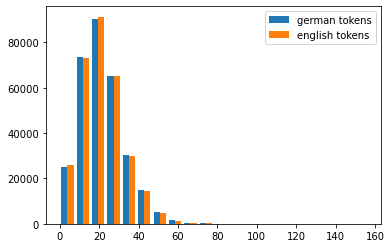

In [95]:
plt.hist([df_german['num_german_tokens'],df_german['num_english_tokens']],bins=20, label=['german tokens', 'english tokens'])
plt.legend(loc='upper right')

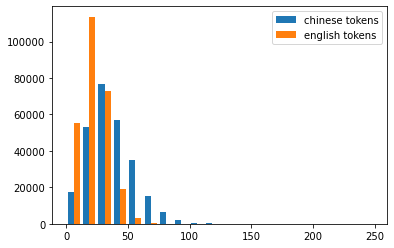

In [96]:
plt.hist([df_chinese['num_chinese_tokens'],df_chinese['num_english_tokens']],bins=20, label=['chinese tokens', 'english tokens'])
plt.legend(loc='upper right')

In [124]:
german_vocab = len(set(itertools.chain.from_iterable(df_german.tokenized_german)))
english_german_vocab = len(set(itertools.chain.from_iterable(df_german.tokenized_english)))

print('Number of unique german words:', german_vocab)
print('Number of unique english words: ', english_german_vocab)

Number of unique german words: 163396
Number of unique english words:  55798


In [125]:
chinese_vocab = len(set(itertools.chain.from_iterable(df_chinese.tokenized_chinese)))
english_chinese_vocab = len(set(itertools.chain.from_iterable(df_chinese.tokenized_english)))

print('Number of unique chinese words:', chinese_vocab)
print('Number of unique english words: ', english_chinese_vocab)

Number of unique chinese words: 15673
Number of unique english words:  51618
